À l'issue des programmes de financement, une ONG humanitaire internationale a récolté environ 10 millions de dollars. Le directeur général doit maintenant décider comment utiliser cet argent de manière stratégique et efficace. Les questions importantes qui se posent au moment de prendre cette décision sont principalement liées aux pays qui ont un besoin urgent d'aide. Votre travail d'analyste de données consiste à classer les pays en fonction des facteurs socio-économiques et sanitaires qui déterminent le développement global des nations. Après cette analyse, vous devez proposer des pays sur lesquels le PDG doit se concentrer et auxquels il doit accorder la plus haute priorité.

Le jeu de données se compose de 10 données récoltées sur 167 pays : 

*Country*: nom du pays

*Child_Mort*: nombre de décès d'enfants de moins de 5 ans pour 1000 naissances vivantes

*Exports*: exportations de biens et de services. Exprimé en % du PIB total

*Health Expenditure*: total des dépenses de santé en pourcentage du PIB total

*Imports*: imports de bien et de  services en pourcentage du PIB total

*Income*: salaire net moyen

*Inflation*: mesure du taux de croissance annuel du PIB total

*Life_Expec*: nombre moyen d'années que vivrait un nouveau-né si les schémas de mortalité actuels restaient inchangés

*TOTAL_FER*: nombre d'enfants qui naîtraient de chaque femme si les taux de fécondité par âge actuels étaient maintenus.

*GDPR*: GDP per capita. Calculated as the total GDP divided by the total population.

In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# <span style="color:blue">Données </span>

In [13]:
df = pd.read_csv('./Country-data.csv')
df.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

# <span style="color:blue">ACP </span>
Faire une ACP sur les données, déterminer le nombre optimal de descripteurs et construire la matrice correspondante pour le clustering par k-moyennes

     child_mort  exports  health  imports  income  inflation  life_expec  \
0          90.2     10.0    7.58     44.9    1610       9.44        56.2   
1          16.6     28.0    6.55     48.6    9930       4.49        76.3   
2          27.3     38.4    4.17     31.4   12900      16.10        76.5   
3         119.0     62.3    2.85     42.9    5900      22.40        60.1   
4          10.3     45.5    6.03     58.9   19100       1.44        76.8   
..          ...      ...     ...      ...     ...        ...         ...   
162        29.2     46.6    5.25     52.7    2950       2.62        63.0   
163        17.1     28.5    4.91     17.6   16500      45.90        75.4   
164        23.3     72.0    6.84     80.2    4490      12.10        73.1   
165        56.3     30.0    5.18     34.4    4480      23.60        67.5   
166        83.1     37.0    5.89     30.9    3280      14.00        52.0   

     total_fer   gdpp  
0         5.82    553  
1         1.65   4090  
2         2.89 

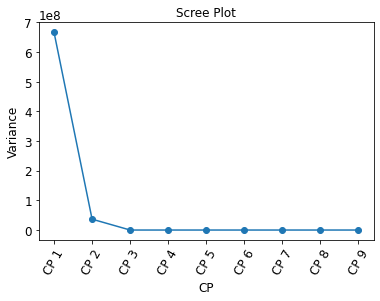

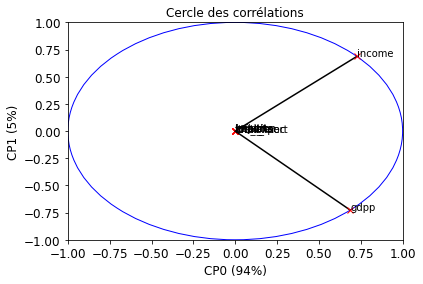

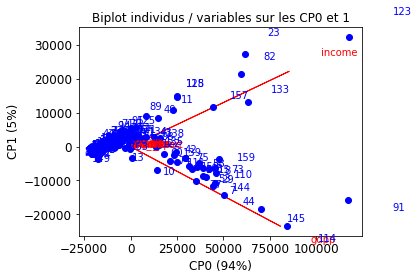

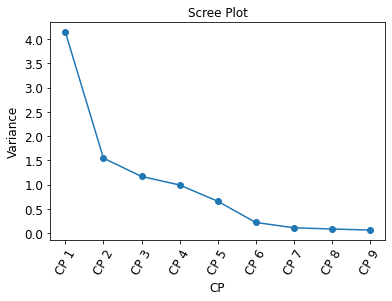

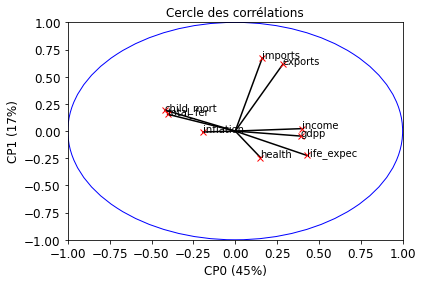

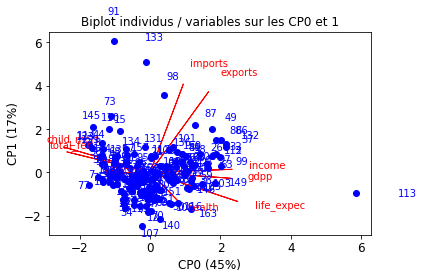

In [21]:
# Suppression de la première colonne, et définition de la matrice des données # 
col_name = [x for x in df.columns if x not in ['country']]
X = df[col_name]

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

def screeplot(Xtr, displayx = True):
    y = np.std(Xtr, axis=0)**2
    x = np.arange(len(y)) + 1
    plt.plot(x, y, "o-")
    if displayx :
        plt.xticks(x, ["CP "+str(i) for i in x], rotation=60)
    plt.ylabel("Variance")
    plt.xlabel("CP")
    plt.title("Scree Plot")
    
def CercleCorrelation(pca,np1,np2,data,nom_features):
    plt.Circle((0,0),radius=10, color='b', fill=False)
    circle1=plt.Circle((0,0),radius=1, color='b', fill=False)
    fig = plt.gcf()
    fig.gca().add_artist(circle1)

    for idx in range(len(nom_features)):
        str1 = "CP" + str(np1)
        str2 = "CP" + str(np2)
        x = pca.components_[np1][idx]
        y = pca.components_[np2][idx]
        plt.plot([0.0,x],[0.0,y],'k-')
        plt.plot(x, y, 'rx')
        plt.annotate(nom_features[idx], xy=(x,y))
    plt.xlabel(str1 +" (%s%%)" % str(pca.explained_variance_ratio_[np1])[:4].lstrip("0."))
    plt.ylabel(str2 +" (%s%%)"% str(pca.explained_variance_ratio_[np2])[:4].lstrip("0."))
    plt.xlim((-1,1))
    plt.ylim((-1,1))
    plt.title("Cercle des corrélations")
    
def biplot(pca,np1,np2,data,nom_features):  
    cp1 = pca.components_[np1]
    cp2 = pca.components_[np2]
    xs = pca.transform(data)[:,np1] 
    ys = pca.transform(data)[:,np2]
    for i in range(len(cp1)):
        plt.arrow(0, 0, cp1[i]*max(xs), cp2[i]*max(ys),
                  color='r', width=0.0005, head_width=0.0025)
        plt.text(cp1[i]*max(xs)*1.2, cp2[i]*max(ys)*1.2,
                 nom_features[i], color='r')

    for i in range(len(xs)):
        plt.plot(xs[i], ys[i], 'bo')
        plt.text(xs[i]*1.2, ys[i]*1.2, i, color='b')
    plt.xlabel("CP" + str(np1) +" (%s%%)" % str(pca.explained_variance_ratio_[np1])[:4].lstrip("0."))
    plt.ylabel("CP" + str(np2) +" (%s%%)"% str(pca.explained_variance_ratio_[np2])[:4].lstrip("0."))
    plt.title("Biplot individus / variables sur les CP" +str(np1)+" et " + str(np2))
    plt.tight_layout()
    
pd.options.mode.chained_assignment = None

pays=pd.read_csv("Country-data.csv",delimiter=",",header=None)
cat_pays=pays.loc[: , 0]
features_pays=X
print(features_pays)
nom_features =['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp'] 
pays.corr()

pca_pays = PCA(n_components=9)
res = pca_pays.fit_transform(features_pays)
plt.figure()
screeplot(res)
plt.figure()
CercleCorrelation(pca_pays,0,1,features_pays,nom_features)
plt.figure()
biplot(pca_pays,0,1,features_pays,nom_features)

scaler = StandardScaler()
res2 = pca_pays.fit_transform(scaler.fit_transform(features_pays))

plt.figure()
screeplot(res2)
plt.figure()
CercleCorrelation(pca_pays,0,1,res2,nom_features)
plt.figure()
biplot(pca_pays,0,1,res2,nom_features)



# <span style="color:blue">Clustering </span>
Appliquer les k-moyennes sur les données transformées par ACP, et répondre à la question initiale. Vous pourrez déterminer le nombre de classes par indice de silhouette par exemple ou en cherchant le coude dans le graphe de l'inertie (accessible via l'attribut inertia_ de l'objet kmeans) en fonction du nombre de classes